In [2]:
from pathlib import Path
from pku_autonomous_driving import io,util,improc

In [3]:
train = io.load_train_data()
test = io.load_test_data()
train.head()

,ImageId,PredictionString
0,ID_8a6e65317,16 0.254839 -2.57534 -3.10256 7.96539 3.20066 ...
1,ID_337ddc495,66 0.163988 0.192169 -3.12112 -3.17424 6.55331...
2,ID_a381bf4d0,43 0.162877 0.00519276 -3.02676 2.1876 3.53427...
3,ID_7c4a3e0aa,43 0.126957 -3.04442 -3.10883 -14.738 24.6389 ...
4,ID_8b510fad6,37 0.16017 0.00862796 -3.0887 -3.04548 3.4977 ...


In [4]:
inp = train['PredictionString'][0]
print('Example input:\n', inp)
print()
print('Output:\n', util.str2coords(inp))

Example input:
 16 0.254839 -2.57534 -3.10256 7.96539 3.20066 11.0225 56 0.181647 -1.46947 -3.12159 9.60332 4.66632 19.339 70 0.163072 -1.56865 -3.11754 10.39 11.2219 59.7825 70 0.141942 -3.1395 3.11969 -9.59236 5.13662 24.7337 46 0.163068 -2.08578 -3.11754 9.83335 13.2689 72.9323

Output:
 [{'id': 16, 'yaw': 0.254839, 'pitch': -2.57534, 'roll': -3.10256, 'x': 7.96539, 'y': 3.20066, 'z': 11.0225}, {'id': 56, 'yaw': 0.181647, 'pitch': -1.46947, 'roll': -3.12159, 'x': 9.60332, 'y': 4.66632, 'z': 19.339}, {'id': 70, 'yaw': 0.163072, 'pitch': -1.56865, 'roll': -3.11754, 'x': 10.39, 'y': 11.2219, 'z': 59.7825}, {'id': 70, 'yaw': 0.141942, 'pitch': -3.1395, 'roll': 3.11969, 'x': -9.59236, 'y': 5.13662, 'z': 24.7337}, {'id': 46, 'yaw': 0.163068, 'pitch': -2.08578, 'roll': -3.11754, 'x': 9.83335, 'y': 13.2689, 'z': 72.9323}]


[[1.45056767e+04 2.21264444e+04 1.08069000e+01]
 [1.89350287e+03 1.96469380e+04 9.58913000e+00]
 [2.04885207e+04 4.47236963e+04 2.44038000e+01]
 [6.94433282e+04 1.22591589e+05 6.93710000e+01]
 [8.29386135e+04 1.16964796e+05 6.56996000e+01]
 [8.96732567e+04 1.15400194e+05 6.44399000e+01]
 [8.79840510e+04 1.05833779e+05 5.93138000e+01]
 [7.93374966e+04 9.19263376e+04 5.10863000e+01]
 [6.83491647e+06 6.31321815e+06 3.48653000e+03]
 [1.69935110e+05 1.19683667e+05 6.46343000e+01]
 [3.29709435e+04 7.84110468e+04 4.45356000e+01]
 [6.19454618e+04 9.85135165e+04 5.56856000e+01]
 [9.77671340e+04 1.30103453e+05 7.33084000e+01]
 [7.10477257e+06 6.28640287e+06 3.50294000e+03]
 [6.45720080e+04 3.69157858e+04 1.83139000e+01]
 [1.75956689e+05 1.26632466e+05 6.88195000e+01]
 [2.04502442e+05 1.50289791e+05 8.17606000e+01]]


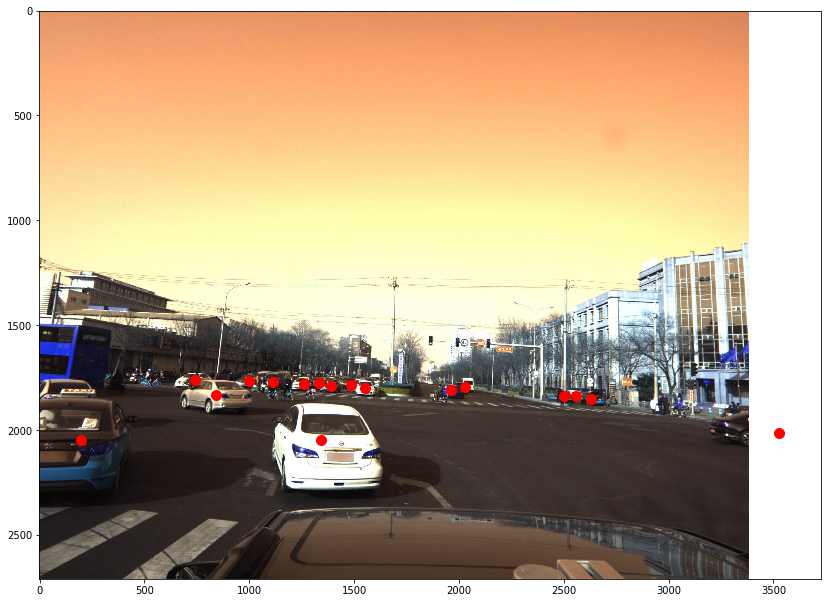

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))
plt.imshow(io.load_image(train['ImageId'][2217]))
plt.scatter(*util.get_img_coords(train['PredictionString'][2217]), color='red', s=100);

[[3.69431798e+04 2.23156449e+04 1.10225000e+01]
 [5.47414655e+04 3.69640063e+04 1.93390000e+01]
 [1.24751770e+05 1.06880689e+05 5.97825000e+01]
 [1.96008501e+04 4.53581965e+04 2.47337000e+01]
 [1.45642635e+05 1.29418597e+05 7.29323000e+01]]
img.shape (700, 1600, 3) std: 0.2870588
mask.shape (87, 200) std: 0.01694915
regr.shape (87, 200, 7) std: 0.0071668467


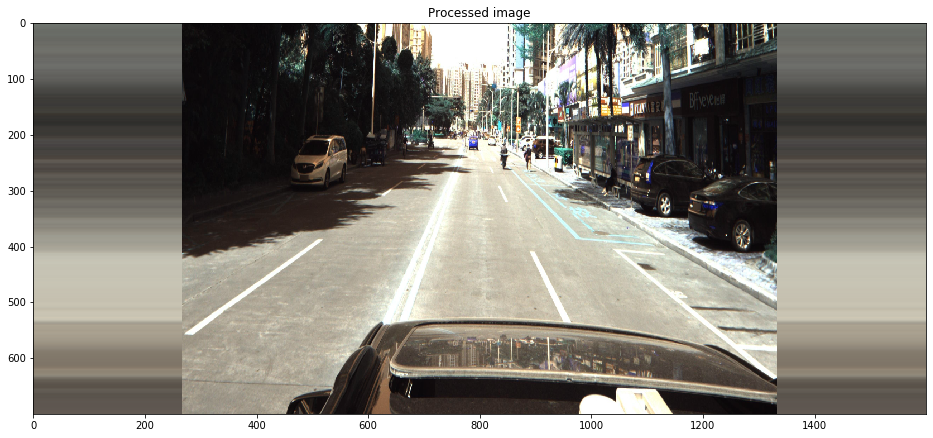

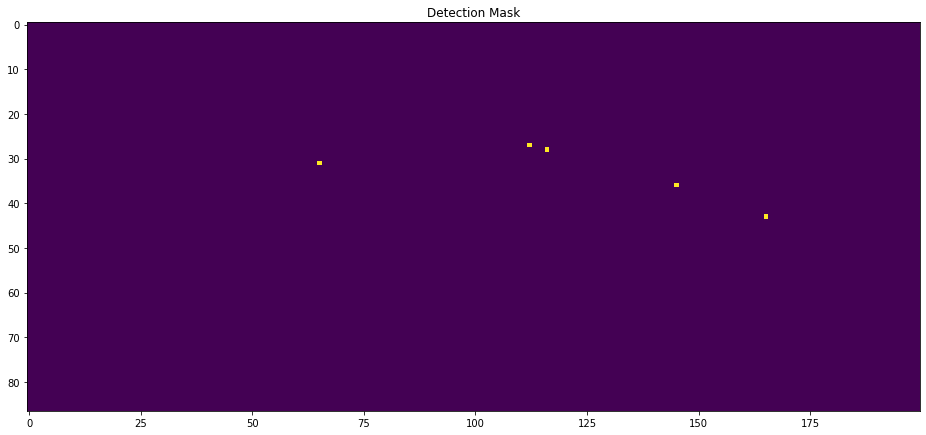

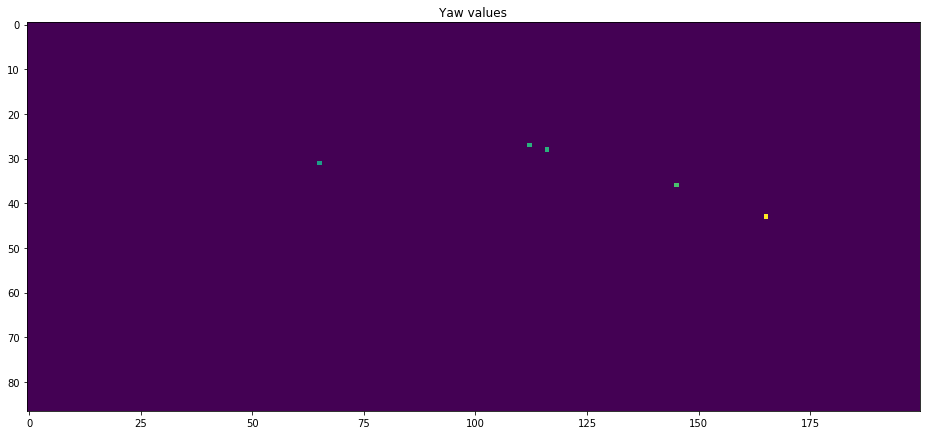

In [6]:
import numpy as np

img0 = io.load_image(train['ImageId'][0])
img = improc.preprocess_image(img0)

mask, regr = improc.get_mask_and_regr(img0, train['PredictionString'][0])

print('img.shape', img.shape, 'std:', np.std(img))
print('mask.shape', mask.shape, 'std:', np.std(mask))
print('regr.shape', regr.shape, 'std:', np.std(regr))

plt.figure(figsize=(16,16))
plt.title('Processed image')
plt.imshow(img)
plt.show()

plt.figure(figsize=(16,16))
plt.title('Detection Mask')
plt.imshow(mask)
plt.show()

plt.figure(figsize=(16,16))
plt.title('Yaw values')
plt.imshow(regr[:,:,-2])
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from pku_autonomous_driving.dataset import CarDataset

df_train, df_dev = train_test_split(train, test_size=0.08, random_state=63)
df_test = test

# Create dataset objects
train_dataset = CarDataset(df_train)
dev_dataset = CarDataset(df_dev)
test_dataset = CarDataset(df_test)

[[3.75105834e+03 1.32993732e+04 6.13930000e+00]
 [4.98444534e+04 9.49418386e+04 5.41050000e+01]
 [2.00430663e+05 2.04303232e+05 1.15619000e+02]
 [2.37180233e+05 2.54465618e+05 1.45136000e+02]
 [2.14478819e+05 2.37868915e+05 1.36206000e+02]
 [6.19296542e+04 1.13372367e+05 6.52654000e+01]
 [8.30570654e+04 1.58111660e+05 9.15263000e+01]
 [7.67489273e+04 1.13888369e+05 6.51590000e+01]]


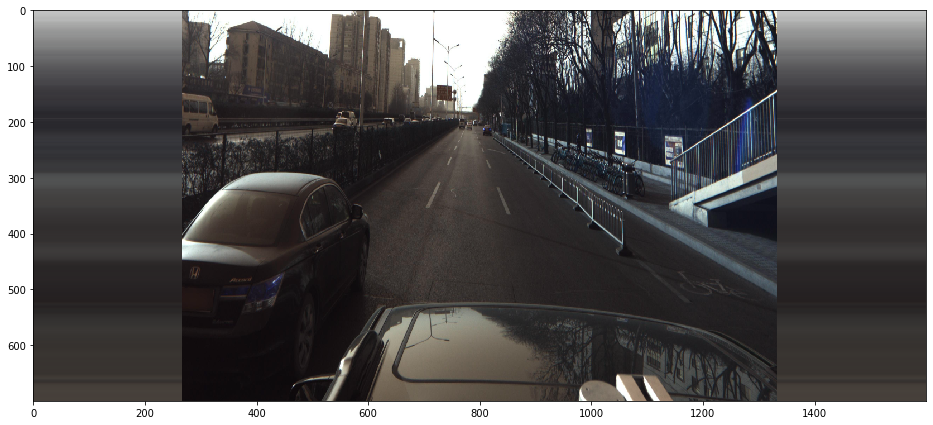

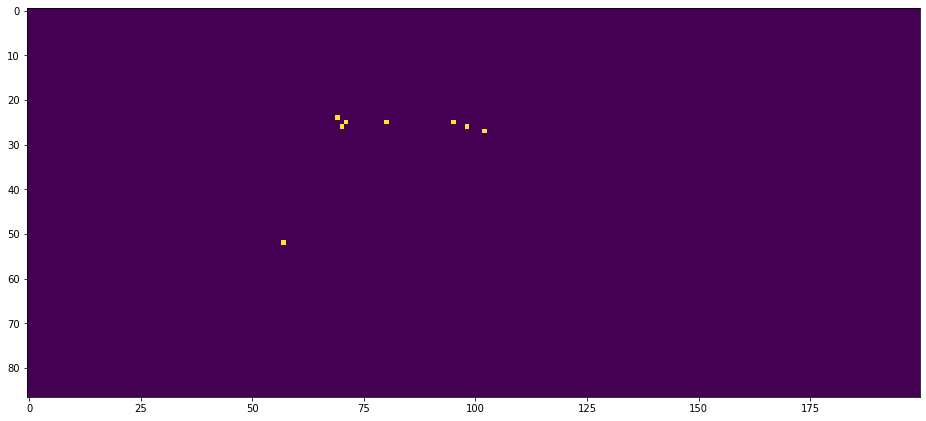

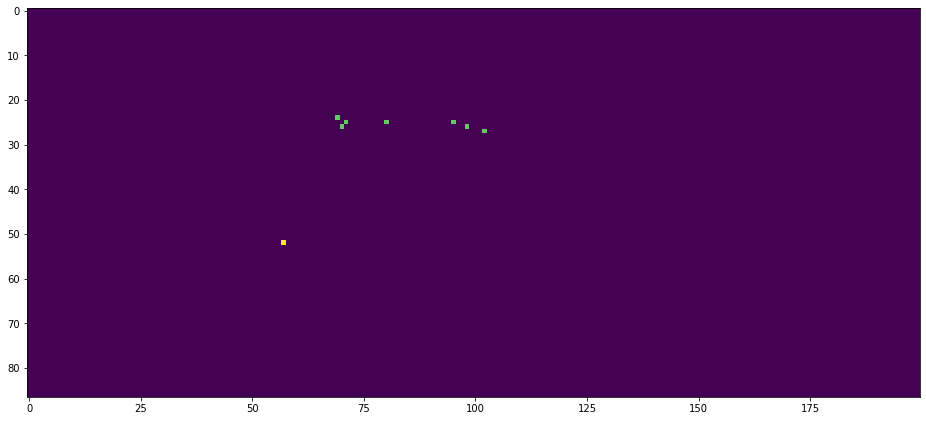

In [8]:
from pku_autonomous_driving import dataset
img, mask, regr = train_dataset[0]

plt.figure(figsize=(16,16))
plt.imshow(np.rollaxis(img, 0, 3))
plt.show()

plt.figure(figsize=(16,16))
plt.imshow(mask)
plt.show()

plt.figure(figsize=(16,16))
plt.imshow(regr[-2])
plt.show()

In [9]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1

# Create data generators - they will produce batches
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
dev_loader = DataLoader(dataset=dev_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [16]:
import importlib
importlib.reload(resnet)
from pku_autonomous_driving import resnet
base_model = resnet.resnext50_32x4d(pretrained=False)
base_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [17]:
import importlib
importlib.reload(centernet)

from pku_autonomous_driving import centernet
import torch
from torch import optim
from torch.optim import lr_scheduler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

n_epochs = 8

model = centernet.CentResnet(base_model, 8, device).to(device)
optimizer = optim.AdamW(model.parameters(), lr=0.001)
#optimizer =  RAdam(model.parameters(), lr = 0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=max(n_epochs, 10) * len(train_loader) // 3, gamma=0.1)

cpu


In [18]:
model

CentResnet(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample):

In [19]:
img_batch = torch.randn((1,3,700,1600))

In [20]:
test = model(img_batch.to(device))

RuntimeError: [enforce fail at CPUAllocator.cpp:64] . DefaultCPUAllocator: can't allocate memory: you tried to allocate 286720000 bytes. Error code 12 (Cannot allocate memory)
